In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [25]:
data = pd.read_csv('data.csv')
data

,NaBH4 Concentrations,absolute maximum,absolute maximum wavelength,integral
0,0.15,0.094,396.0,24.236
1,0.25,0.099,405.0,16.095
2,0.25,0.265,415.5,54.835
3,0.35,0.297,402.0,48.465
4,0.53,0.496,406.5,71.323
5,0.53,0.551,410.5,74.040
6,0.75,0.510,420.5,80.318
7,0.75,0.567,403.5,72.131
8,1.06,0.538,409.5,76.288
9,1.06,0.567,402.5,71.907


In [29]:
concentration = data.iloc[:,0]
abs_max=data.iloc[:,1]
abs_max_waveLength = data.iloc[:,2]
integral = data.iloc[:,3]
concentration

0     0.15
1     0.25
2     0.25
3     0.35
4     0.53
5     0.53
6     0.75
7     0.75
8     1.06
9     1.06
10    1.25
Name: NaBH4 Concentrations, dtype: float64

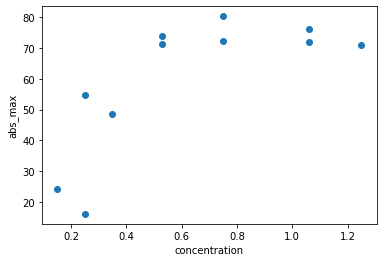

In [41]:
plt.scatter(concentration,abs_max)
plt.xlabel('concentration')
plt.ylabel('abs_max')
plt.show()

In [32]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [45]:
y_pred = lr.predict(X_test)
y_pred

array([ 0.28772925,  0.41218207, -0.31630405,  0.29588832])

In [46]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

-1.5918532693528946
0.41630023230687524


In [47]:
lr.coef_

array([ 0.42684147,  0.05345084, -0.19217769])

In [53]:
y_est = lr.coef_[0] * abs_max


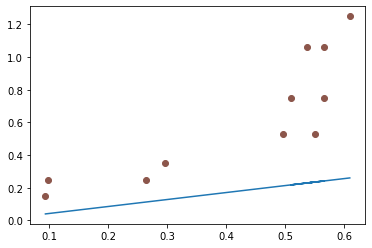

In [54]:
fig, ax = plt.subplots()
ax.plot( abs_max, y_est, '-')

ax.plot(abs_max, concentration, 'o', color='tab:brown')

In [55]:
import tensorflow as tf


In [62]:
dpModel = tf.keras.models.Sequential()

dpModel.add(tf.keras.layers.Dense(units = 3,activation = 'relu'))
dpModel.add(tf.keras.layers.Dense(units = 4,activation = 'relu'))
dpModel.add(tf.keras.layers.Dense(units = 1,activation = 'relu'))

dpModel.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = 'accuracy')

In [63]:
dpModel.fit(X_train,y_train,batch_size = 1,epochs = 6)

Epoch 1/6
7/7 [==============================] - 0s 998us/step - loss: 0.3899 - accuracy: 0.0000e+00
Epoch 2/6
7/7 [==============================] - 0s 1ms/step - loss: 0.3879 - accuracy: 0.0000e+00
Epoch 3/6
7/7 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.0000e+00
Epoch 4/6
7/7 [==============================] - 0s 1ms/step - loss: 0.3831 - accuracy: 0.0000e+00
Epoch 5/6
7/7 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.0000e+00
Epoch 6/6
7/7 [==============================] - 0s 1ms/step - loss: 0.3783 - accuracy: 0.0000e+00


In [83]:
y_pred_dp = dpModel.predict(X_test)
y_pred_dp

array([[0.        ],
       [0.03135896],
       [0.        ],
       [0.03135896]], dtype=float32)

In [217]:
X = np.array([0.094,0.265,0.297,0.5235,0.5385,0.567,0.61]).reshape(-1,1)
y = np.array([0.15,0.25,0.35,0.53,0.75,1.06,1.25])

In [211]:
X = abs_max.values.reshape(-1,1)
y = concentration.values

In [218]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression()

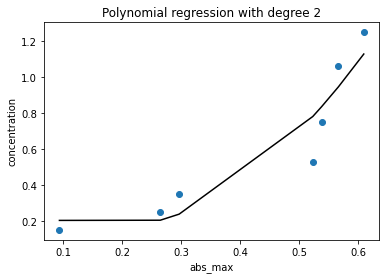

In [220]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X,y)
plt.plot(X,lin2.predict(poly.fit_transform(X)),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.xlabel('abs_max')
plt.ylabel('concentration')
plt.show()

In [221]:
lin2.score(X_poly,y)


0.889596982118182

In [136]:
print(lin2.intercept_)
lin2.coef_

0.314793286048459


array([ 0.        , -1.672553  ,  4.82433019])